In [2]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [3]:
codon_to_aa = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}

In [4]:
df = pd.read_csv('../spike_fubar_delta.tsv', sep='\t')
for col in df.columns:
    if 'amino_counts' in col:
        df[col] = df[col].apply(lambda s: ast.literal_eval(s))

In [5]:
prob_pairs = {}
for col in df.columns:
    if 'Prob[alpha<beta]' in col:
        key = col.split('_')[0]
        prob_pairs.setdefault(key, []).append(col)
for key, value in list(prob_pairs.items()):
    if len(value) != 2:
        del prob_pairs[key]

diff_df = pd.DataFrame()
for key, value in prob_pairs.items():
    if len(value) == 2:
        diff_df[f'{key}_diff'] = (df[value[1]] - df[value[0]])

df = pd.merge(df, diff_df, left_index=True, right_index=True)

In [6]:
import pandas as pd

# Define the date range
date_range = pd.date_range(start='2021-08', end='2022-02', freq='M').strftime('%Y-%m')

# Process each pair of columns and create new columns
for date in date_range:
    vacced_col = f'{date}_vaccinated_Prob[alpha<beta]'
    unvacced_col = f'{date}_unvaccinated_Prob[alpha<beta]'
    
    # Check if both columns exist in the DataFrame
    if vacced_col in df.columns and unvacced_col in df.columns:
        # Construct the new column
        df[f'{date}-comparison'] = 0
        df.loc[df[vacced_col] >= 0.9, f'{date}-comparison'] = 1
        df.loc[df[unvacced_col] >= 0.9, f'{date}-comparison'] = 2
        df.loc[(df[vacced_col] >= 0.9) & (df[unvacced_col] >= 0.9), f'{date}-comparison'] = 3

comparison_columns = [f'{date}-comparison' for date in date_range]
new_df = df[df[comparison_columns].any(axis=1)]


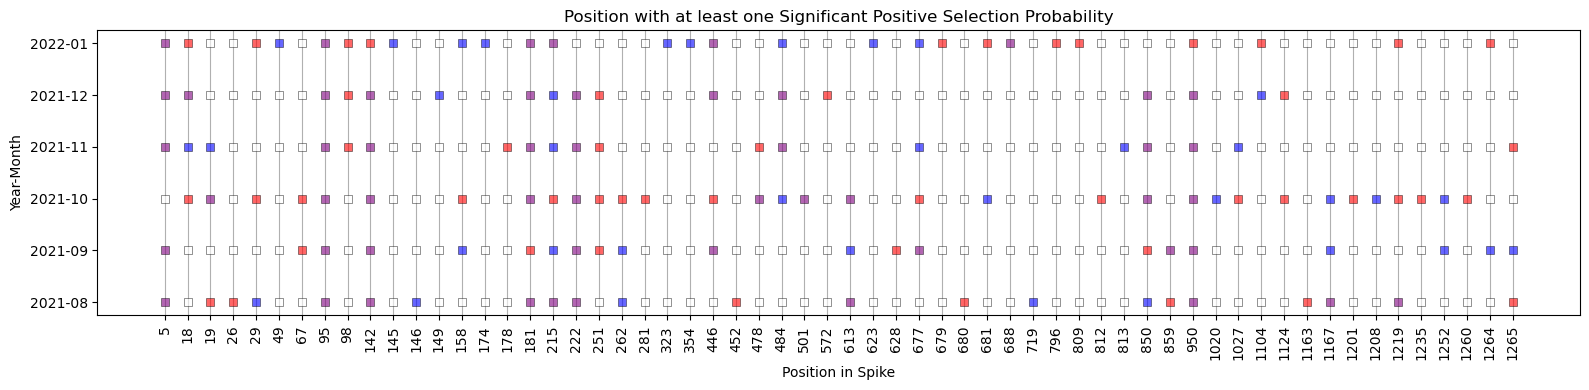

In [7]:
import pandas as pd

# Define the threshold value
threshold = 0.90

# Define the date range
date_range = pd.date_range(start='2021-08', end='2022-02', freq='M').strftime('%Y-%m')

# Process each pair of columns and create new columns
for date in date_range:
    vacced_col = f'{date}_vaccinated_Prob[alpha<beta]'
    unvacced_col = f'{date}_unvaccinated_Prob[alpha<beta]'
    
    # Check if both columns exist in the DataFrame
    if vacced_col in df.columns and unvacced_col in df.columns:
        # Construct the new column
        df[f'{date}-comparison'] = 0
        df.loc[df[vacced_col] >= threshold, f'{date}-comparison'] = 1
        df.loc[df[unvacced_col] >= threshold, f'{date}-comparison'] = 2
        df.loc[(df[vacced_col] >= threshold) & (df[unvacced_col] >= threshold), f'{date}-comparison'] = 3

comparison_columns = [f'{date}-comparison' for date in date_range]
new_df = df[df[comparison_columns].any(axis=1)]


colors = {0:'white', 3:'purple', 1:'blue', 2:'red'}
new_df = new_df.reset_index(drop=True)
comparison_columns = [col for col in new_df.columns if col.endswith('comparison')]
plt.figure(figsize=(16, 4))
plt.grid(axis='x', zorder=0)
for index, row in new_df.iterrows():
    for i, comparison in enumerate(comparison_columns):
        date = comparison.rsplit('-', 1)[0]
        plt.scatter(index, date, color=colors[row[comparison]], marker='s', alpha=0.6, edgecolors='black', linewidths=0.5, zorder=3)

ax = plt.gca()
ax.set_xticks(range(len(new_df)))
ax.set_xticklabels(new_df['Position_in_reference'])
plt.title('Position with at least one Significant Positive Selection Probability')
plt.xlabel('Position in Spike')
plt.ylabel('Year-Month')
plt.xticks(rotation=90)
plt.tight_layout()


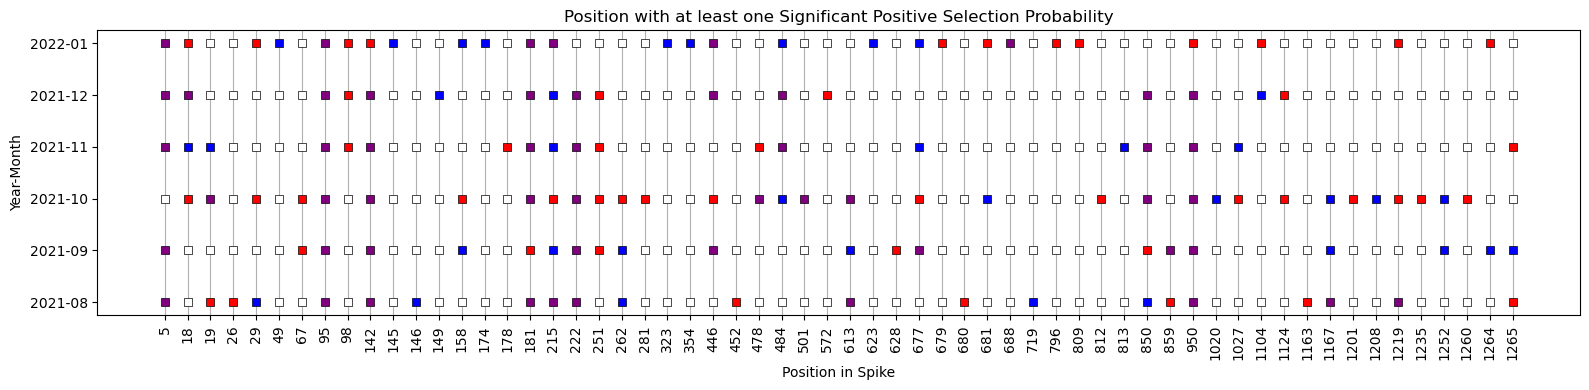

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Assuming new_df and df are already defined as in your script

colors = {0:'white', 3:'purple', 1:'blue', 2:'red'}
new_df = new_df.reset_index(drop=True)
comparison_columns = [col for col in new_df.columns if col.endswith('comparison')]
plt.figure(figsize=(16, 4))
plt.grid(axis='x', zorder=0)
for index, row in new_df.iterrows():
    for i, comparison in enumerate(comparison_columns):
        date = comparison.rsplit('-', 1)[0]
        plt.scatter(index, date, color=colors[row[comparison]], marker='s', edgecolors='black', linewidths=0.5, zorder=3)

ax = plt.gca()
ax.set_xticks(range(len(new_df)))
ax.set_xticklabels(new_df['Position_in_reference'])
plt.title('Position with at least one Significant Positive Selection Probability')
plt.xlabel('Position in Spike')
plt.ylabel('Year-Month')
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust the layout
plt.show()


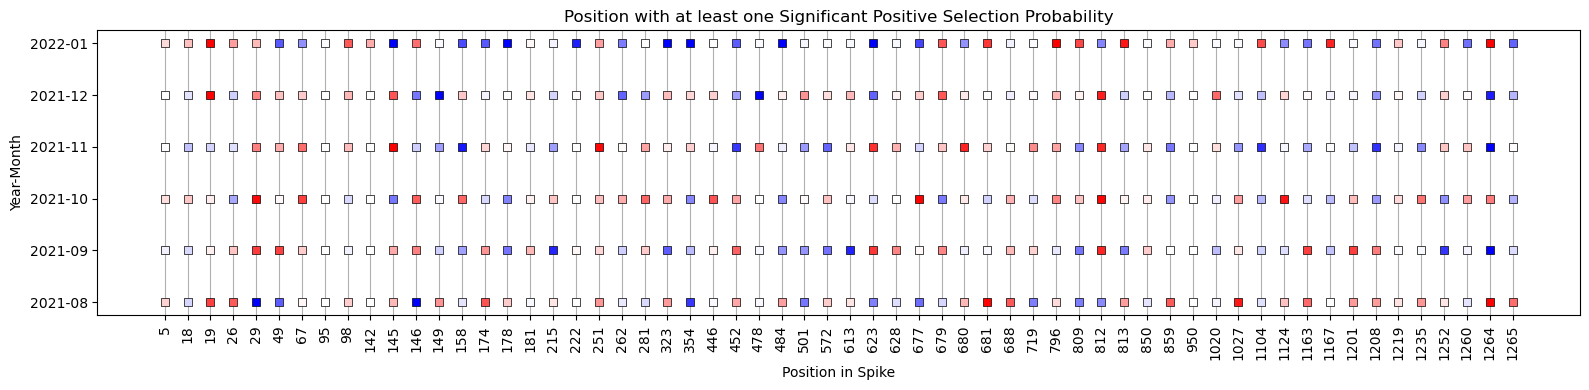

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Assuming new_df is your DataFrame
new_df = new_df.reset_index(drop=True)
diff_columns = [col for col in new_df.columns if col.endswith('diff')][2:]

# Create a custom colormap (red -> white -> blue)
cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["red", "white", "blue"])

# Define the range of your diff values for normalization
# Assuming the diff values range from -1 to 1
min_diff = -0.5
max_diff = 0.5

plt.figure(figsize=(16, 4))
plt.grid(axis='x', zorder=0)

for index, row in new_df.iterrows():
    for i, diff in enumerate(diff_columns):
        date = diff.split('_')[0]
        normalized_value = (row[diff] - min_diff) / (max_diff - min_diff)
        color = cmap(normalized_value)
        plt.scatter(index, date, marker='s', color=color, edgecolors='black', linewidths=0.5, zorder=3)

ax = plt.gca()
ax.set_xticks(range(len(new_df)))
ax.set_xticklabels(new_df['Position_in_reference'])
plt.title('Position with at least one Significant Positive Selection Probability')
plt.xlabel('Position in Spike')
plt.ylabel('Year-Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [10]:
df['[alpha<beta]_max_diff'].sort_values(ascending=False).head(10)


145     0.793178
1263    0.744950
144     0.743214
68      0.726679
322     0.709629
28      0.647136
307     0.628253
343     0.625631
148     0.607507
674     0.587046
Name: [alpha<beta]_max_diff, dtype: float64

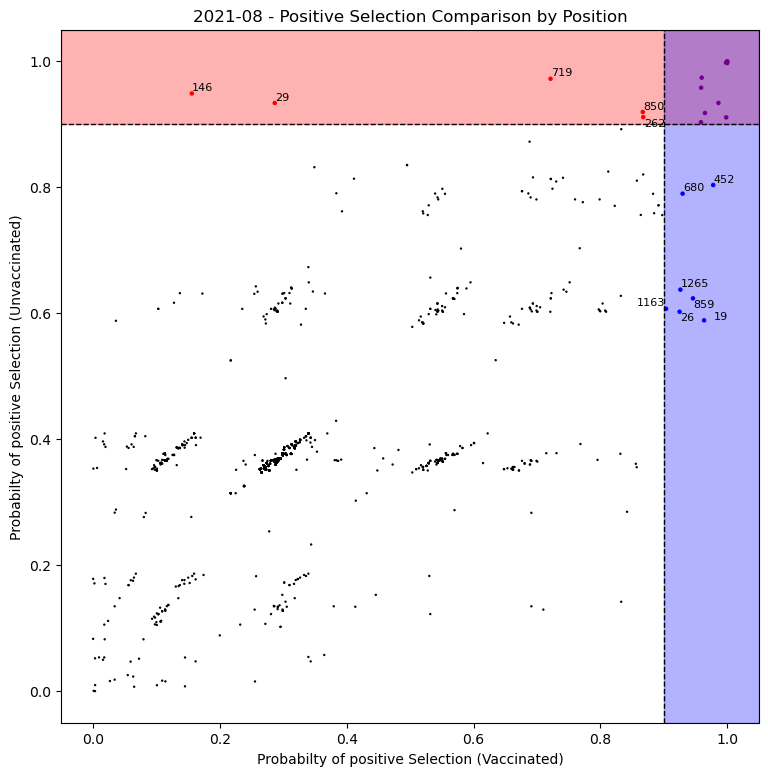

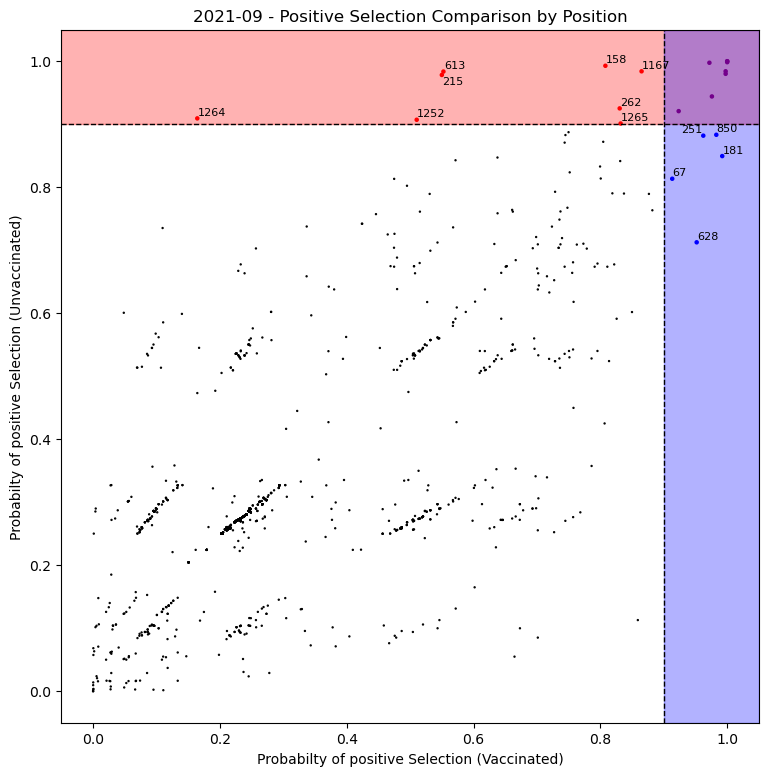

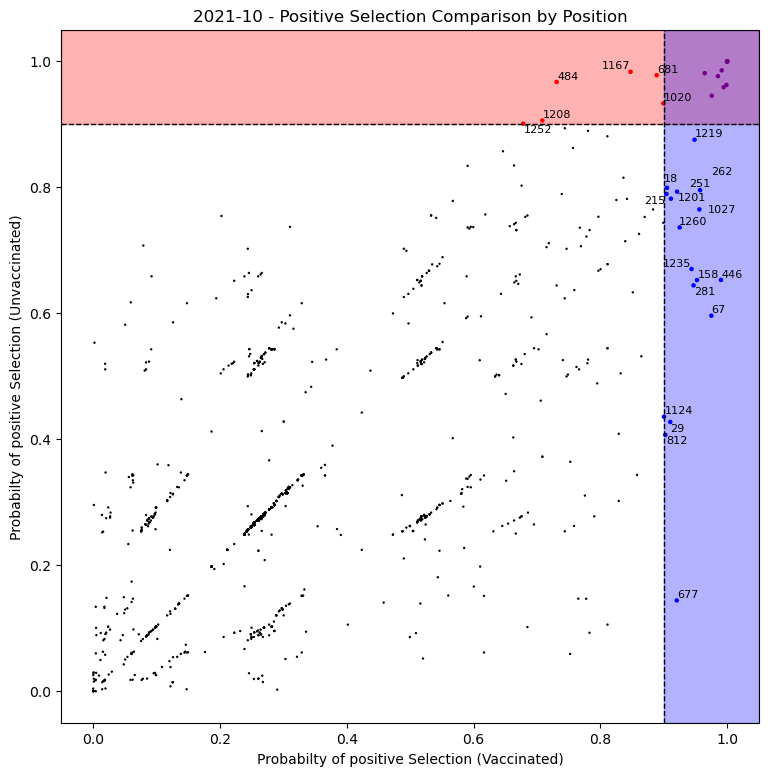

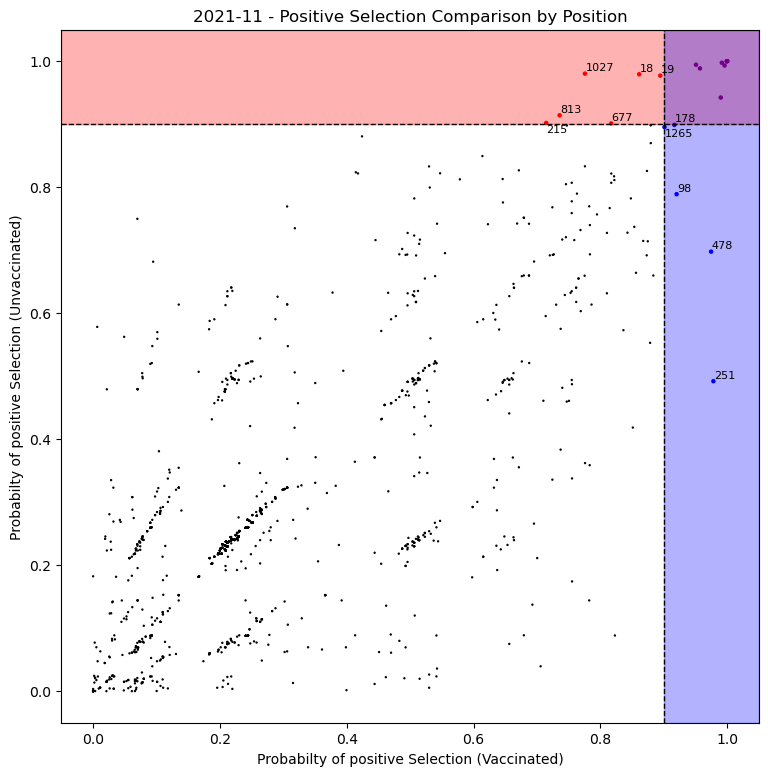

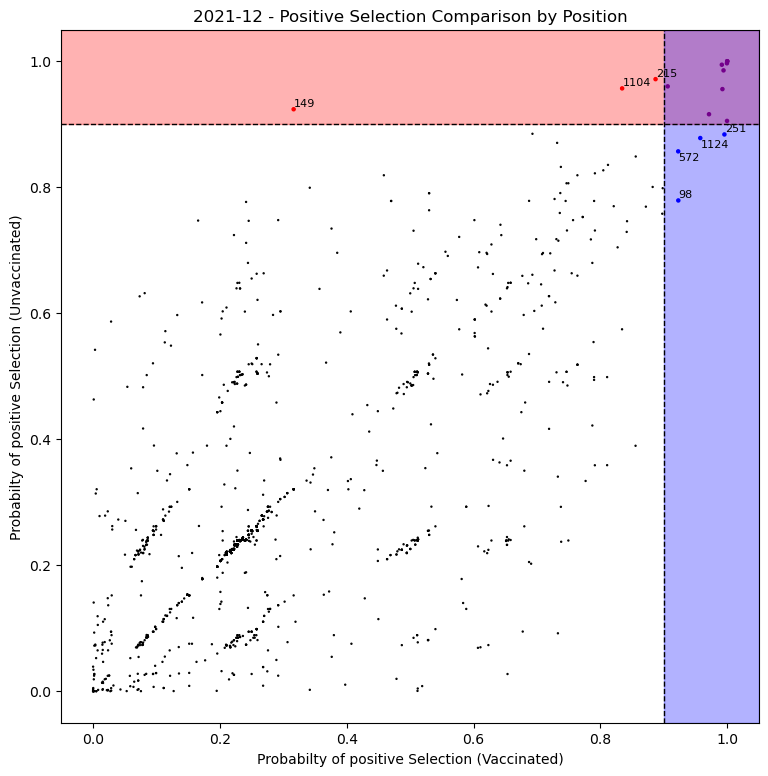

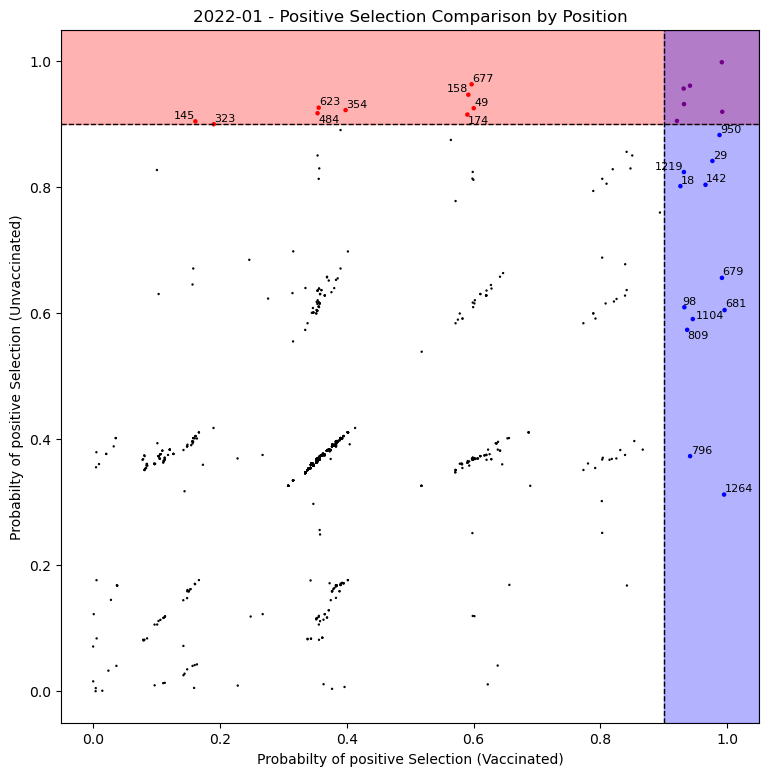

In [11]:
for date, (vacced_col, unvacced_col) in prob_pairs.items():
    conditions = [(df[vacced_col] >= 0.9) & (df[unvacced_col] >= 0.9), (df[vacced_col] >= 0.9) & (df[unvacced_col] < 0.9), (df[vacced_col] < 0.9) & (df[unvacced_col] >= 0.9)]
    choices = ['purple', 'blue', 'red']
    df['plot_colors'] = np.select(conditions, choices, default='black')
    df['plot_size'] = [5 if val != 'black' else 0.5 for val in df['plot_colors']]
    df['plot_labels'] = [pos if val in ['red', 'blue'] else -1 for val, pos in zip(df['plot_colors'], df['Position_in_reference'])]
    
    colors = ['red' if val >= 0.9 else 'black' for val in df[vacced_col]]
    plt.figure(figsize=(9, 9))
    plt.scatter(df[vacced_col], df[unvacced_col], s=df['plot_size'], c=df['plot_colors'])
    plt.hlines(0.9, -0.05, 1.05, linewidth=1, linestyles='dashed', colors='black')
    plt.vlines(0.9, -0.05, 1.05, linewidth=1, linestyles='dashed', colors='black')
    plt.title(f'{date} - Positive Selection Comparison by Position')
    plt.xlabel('Probabilty of positive Selection (Vaccinated)')
    plt.ylabel('Probabilty of positive Selection (Unvaccinated)')

    plt.axhspan(0.9, 1.05, color='red', alpha=0.3, edgecolor=None)
    plt.axvspan(0.9, 1.05, color='blue', alpha=0.3, edgecolor=None)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    text_labels = []
    for x, y, pos, amino_counts_ja, amino_counts_nein in zip(df[vacced_col], df[unvacced_col], df['plot_labels'], df[f'{date}_vaccinated_codon_counts'], df[f'{date}_unvaccinated_codon_counts']):
        if pos != -1:
            text_labels.append(plt.text(x, y, pos, fontsize=8))
    adjust_text(text_labels)

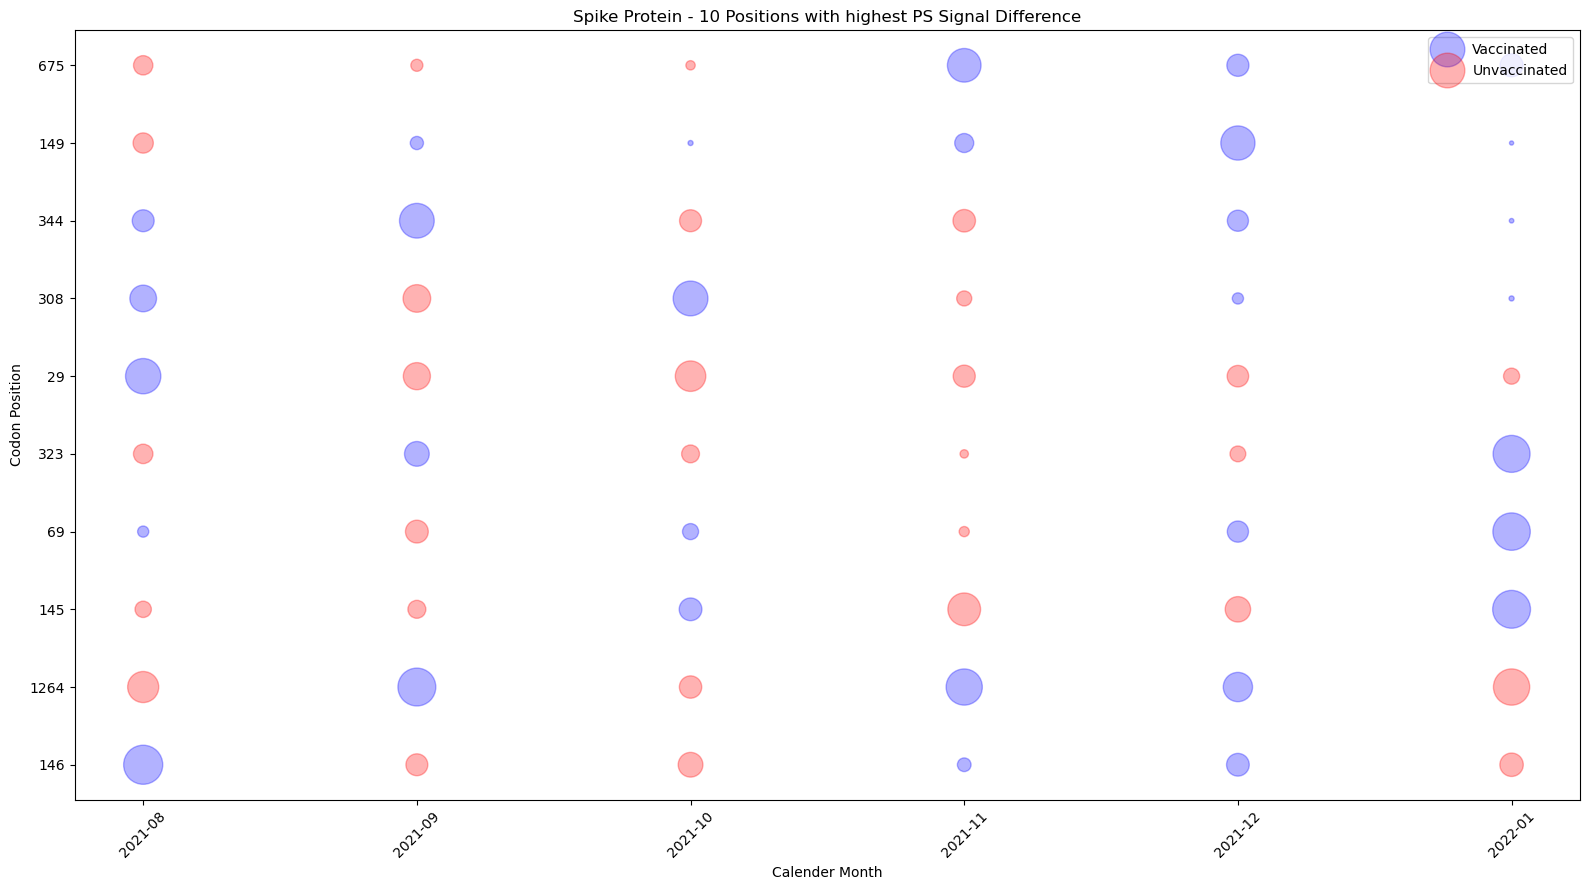

In [12]:
df_top10 = df.sort_values(by='[alpha<beta]_max_diff', ascending=False).head(10).reset_index(drop=True)
vacced_cols = [col for col in df_top10.columns if col.endswith('_vaccinated_Prob[alpha<beta]')]
unvacced_cols = [col for col in df_top10.columns if col.endswith('_unvaccinated_Prob[alpha<beta]')]

plt.figure(figsize=(16, 9))

# for col in vacced_cols:
#     date = col.split('_')[0]
#     plt.scatter([date]*len(df_top10[col]), df_top10[col].index, s=df_top10[col]*1000, c='blue', alpha=0.3, label='vaccinated')


# for col in unvacced_cols:
#     date = col.split('_')[0]
#     plt.scatter([date]*len(df_top10[col]), df_top10[col].index, s=df_top10[col]*1000, c='red', alpha=0.3, label='unvaccinated')


for v_col, u_col in zip(vacced_cols, unvacced_cols):
    date = v_col.split('_')[0]
    test = df_top10[v_col] - df_top10[u_col]
    color = ['blue' if diff > 0 else 'red' for diff in test]
    plt.scatter([date]*len(df_top10[col]), df_top10[col].index, s=abs(test)*1000, c=color, alpha=0.3, label='unvaccinated')


plt.title('Spike Protein - 10 Positions with highest PS Signal Difference')
plt.xticks(rotation=45)
plt.xlabel('Calender Month')
plt.ylabel('Codon Position')
ax = plt.gca()
ax.set_yticks(range(len(df_top10)))
ax.set_yticklabels(df_top10['Position_in_reference'])


import matplotlib.lines as mlines
blue_dot = mlines.Line2D([], [], color='blue', alpha=0.3, marker='o', linestyle='None',
                         markersize=25, label='Vaccinated')
red_dot = mlines.Line2D([], [], color='red', alpha=0.3, marker='o', linestyle='None',
                         markersize=25, label='Unvaccinated')

# Add legend with custom entries
plt.legend(handles=[blue_dot, red_dot], loc='upper right')
plt.tight_layout()

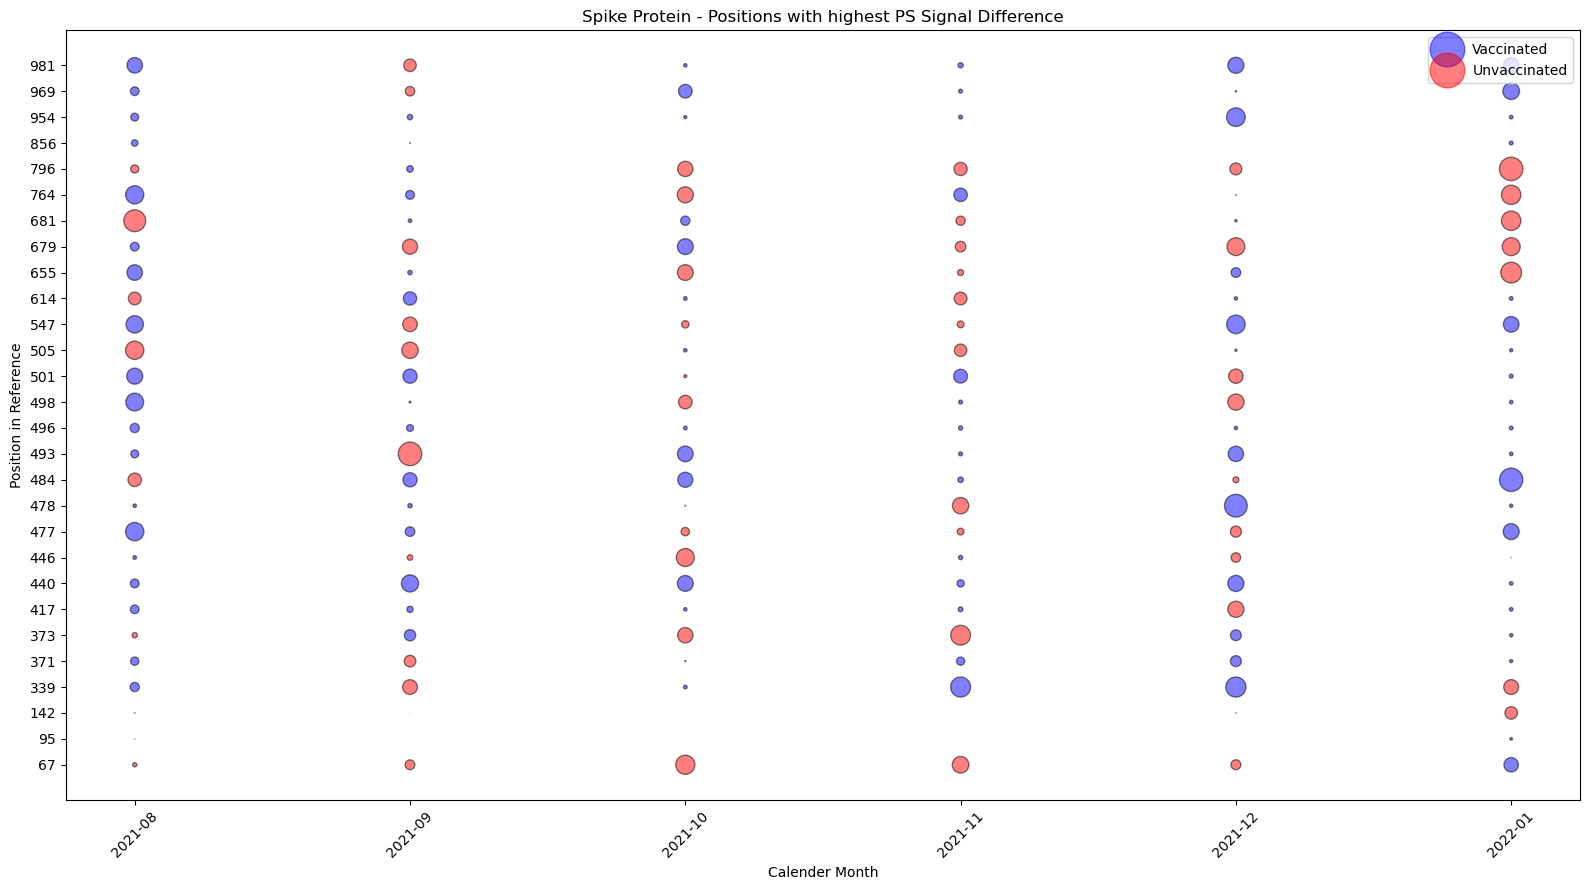

In [13]:
positions = [67, 95, 142, 339, 371, 373, 417, 440, 446, 477, 478, 484, 493, 496, 498, 501, 505, 547, 614, 655, 679, 681, 764, 796, 856, 954, 969, 981]
df_top10 = df.sort_values(by='[alpha<beta]_max_diff', ascending=False).head(10).reset_index(drop=True)
df_top10 = df[df['Position_in_reference'].isin(positions)].reset_index(drop=True)
vacced_cols = [col for col in df_top10.columns if col.endswith('_vaccinated_Prob[alpha<beta]')]
unvacced_cols = [col for col in df_top10.columns if col.endswith('_unvaccinated_Prob[alpha<beta]')]

plt.figure(figsize=(16, 9))

# for col in vacced_cols:
#     date = col.split('_')[0]
#     plt.scatter([date]*len(df_top10[col]), df_top10[col].index, s=df_top10[col]*1000, c='blue', alpha=0.3, label='vaccinated')


# for col in unvacced_cols:
#     date = col.split('_')[0]
#     plt.scatter([date]*len(df_top10[col]), df_top10[col].index, s=df_top10[col]*1000, c='red', alpha=0.3, label='unvaccinated')


for v_col, u_col in zip(vacced_cols, unvacced_cols):
    date = v_col.split('_')[0]
    test = df_top10[v_col] - df_top10[u_col]
    color = ['blue' if diff > 0 else 'red' for diff in test]
    plt.scatter([date]*len(df_top10[col]), df_top10[col].index, s=abs(test)*500, c=color, alpha=0.5, edgecolors='black', label='unvaccinated')


plt.title('Spike Protein - Positions with highest PS Signal Difference')
plt.xticks(rotation=45)
plt.xlabel('Calender Month')
plt.ylabel('Position in Reference')
ax = plt.gca()
ax.set_yticks(range(len(df_top10)))
ax.set_yticklabels(df_top10['Position_in_reference'])


import matplotlib.lines as mlines
blue_dot = mlines.Line2D([], [], color='blue', alpha=0.5, marker='o', linestyle='None',
                         markersize=25, label='Vaccinated')
red_dot = mlines.Line2D([], [], color='red', alpha=0.5, marker='o', linestyle='None',
                         markersize=25, label='Unvaccinated')

# Add legend with custom entries
plt.legend(handles=[blue_dot, red_dot], loc='upper right')
plt.tight_layout()

In [14]:
import pandas as pd

# Assuming df is your DataFrame
# Filter the DataFrame for the specific position
test = df[df['Position_in_reference'] == 146]

# Identify the unvaccinated columns
unvaccinated_columns = [col for col in df.columns if 'unvaccinated_codon_counts' in col]

# Initialize a list to store the individual dataframes
dfs = []

# Process each unvaccinated column
for col in unvaccinated_columns:
    # Extract the yyyy-mm date part from the column name
    date = col.split('_')[0]
    
    # Get the dictionary from the row and evaluate it
    dict_str = test[col].iloc[0]
    codon_count_dict = eval(dict_str)

    # Transform this dictionary into a DataFrame
    df_temp = pd.DataFrame([codon_count_dict])
    df_temp['Date'] = date  # Add a date column

    # Append to the list
    dfs.append(df_temp)

# Concatenate all dataframes
final_df = pd.concat(dfs)
final_df.set_index('Date', inplace=True)

# Replace NaN with 0 and convert to integers
final_df = final_df.fillna(0).astype(int)


final_df.to_clipboard()


In [15]:
import pandas as pd

# Assuming df is your DataFrame
# Filter the DataFrame for the specific position
test = df[df['Position_in_reference'] == 146]

# Identify the unvaccinated columns
unvaccinated_columns = [col for col in df.columns if '_vaccinated_codon_counts' in col]

# Initialize a list to store the individual dataframes
dfs = []

# Process each unvaccinated column
for col in unvaccinated_columns:
    # Extract the yyyy-mm date part from the column name
    date = col.split('_')[0]
    
    # Get the dictionary from the row and evaluate it
    dict_str = test[col].iloc[0]
    codon_count_dict = eval(dict_str)

    # Transform this dictionary into a DataFrame
    df_temp = pd.DataFrame([codon_count_dict])
    df_temp['Date'] = date  # Add a date column

    # Append to the list
    dfs.append(df_temp)

# Concatenate all dataframes
final_df = pd.concat(dfs)
final_df.set_index('Date', inplace=True)

# Replace NaN with 0 and convert to integers
final_df = final_df.fillna(0).astype(int)

final_df.to_clipboard()


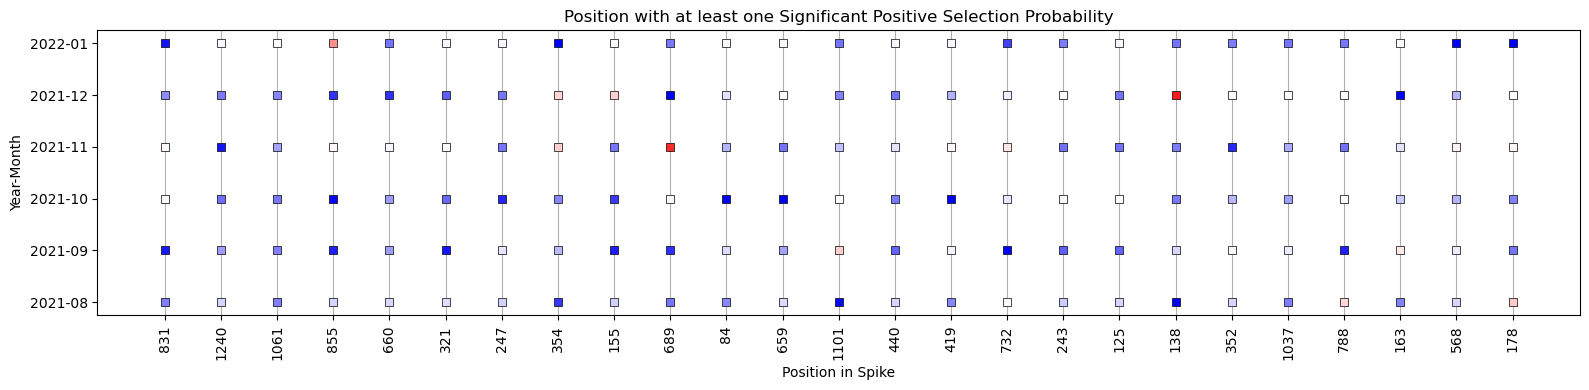

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Assuming new_df is your DataFrame
new_df = df.sort_values(by='[alpha<beta]_mean_diff', ascending=False).head(25)
new_df = new_df.reset_index(drop=True)
diff_columns = [col for col in new_df.columns if col.endswith('diff')][2:]

# Create a custom colormap (red -> white -> blue)
cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["red", "white", "blue"])

# Define the range of your diff values for normalization
# Assuming the diff values range from -1 to 1
min_diff = -0.5
max_diff = 0.5

plt.figure(figsize=(16, 4))
plt.grid(axis='x', zorder=0)

for index, row in new_df.iterrows():
    for i, diff in enumerate(diff_columns):
        date = diff.split('_')[0]
        normalized_value = (row[diff] - min_diff) / (max_diff - min_diff)
        color = cmap(normalized_value)
        plt.scatter(index, date, marker='s', color=color, edgecolors='black', linewidths=0.5, zorder=3)

ax = plt.gca()
ax.set_xticks(range(len(new_df)))
ax.set_xticklabels(new_df['Position_in_reference'])
plt.title('Position with at least one Significant Positive Selection Probability')
plt.xlabel('Position in Spike')
plt.ylabel('Year-Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


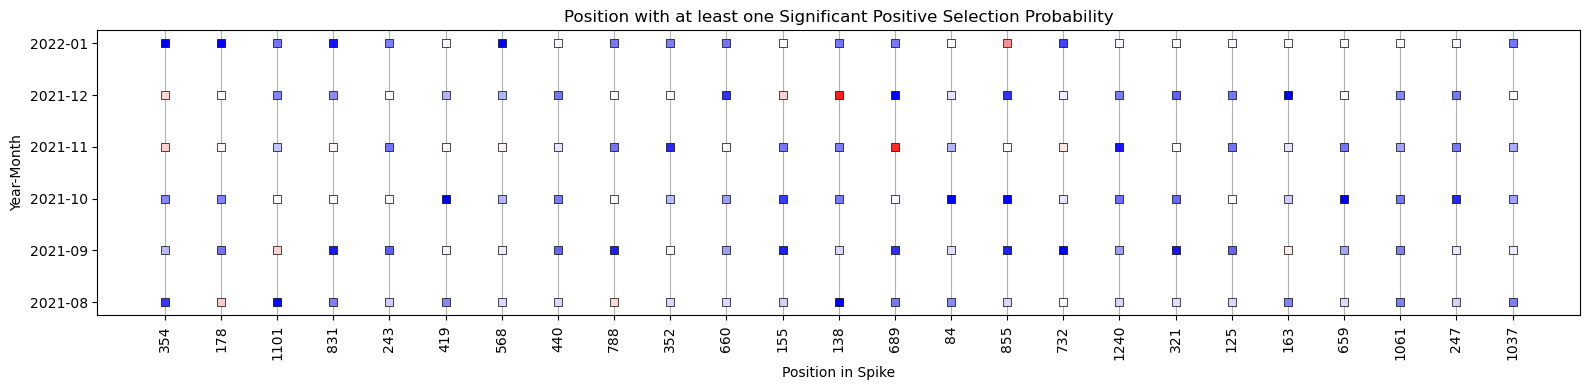

In [35]:
df.sort_values(by='[alpha<beta]_mean_diff', ascending=False)[['Position_in_reference', '[alpha<beta]_max_diff', '[alpha<beta]_mean_diff']]
test_cols = [col for col in df.columns if col.endswith('_vaccinated_Prob[alpha<beta]')]
# new_df.head(25)
df['max_vacc_prob'] = df[test_cols].max(axis=1)
new_df = df.sort_values(by='[alpha<beta]_mean_diff', ascending=False).head(25)
new_df = new_df.sort_values(by='max_vacc_prob', ascending=False)
new_df = new_df.reset_index(drop=True)

diff_columns = [col for col in new_df.columns if col.endswith('diff')][2:]

# Create a custom colormap (red -> white -> blue)
cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["red", "white", "blue"])

# Define the range of your diff values for normalization
# Assuming the diff values range from -1 to 1
min_diff = -0.5
max_diff = 0.5

plt.figure(figsize=(16, 4))
plt.grid(axis='x', zorder=0)

for index, row in new_df.iterrows():
    for i, diff in enumerate(diff_columns):
        date = diff.split('_')[0]
        normalized_value = (row[diff] - min_diff) / (max_diff - min_diff)
        color = cmap(normalized_value)
        plt.scatter(index, date, marker='s', color=color, edgecolors='black', linewidths=0.5, zorder=3)

ax = plt.gca()
ax.set_xticks(range(len(new_df)))
ax.set_xticklabels(new_df['Position_in_reference'])
plt.title('Position with at least one Significant Positive Selection Probability')
plt.xlabel('Position in Spike')
plt.ylabel('Year-Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()